In [2]:
# import necessary packages
!pip install -q tfds-nightly tensorflow matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 23.3 MB/s eta 0:00:00


In [3]:
#tfds.list_builders()
builder = tfds.builder('pneumonia_mnist')
# 1. Create the tfrecord files (no-op if already exists)
builder.download_and_prepare()
# 2. Load the `tf.data.Dataset`
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.4NXWF6_1.0.0/pneumonia_mnist-train.tfrecord*...…

Generating val examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.4NXWF6_1.0.0/pneumonia_mnist-val.tfrecord*...: …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/pneumonia_mnist/incomplete.4NXWF6_1.0.0/pneumonia_mnist-test.tfrecord*...:…

Dataset pneumonia_mnist downloaded and prepared to /root/tensorflow_datasets/pneumonia_mnist/1.0.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [4]:
# Load train and test sets
ds_train, info_train = tfds.load('pneumonia_mnist', split='train', with_info=True)
ds_test, info_test = tfds.load('pneumonia_mnist', split='test', with_info=True)

In [5]:
#  Prepare training and testing data
train_images = []
train_labels = []
for example in ds_train.take(10):
    train_images.append(example['image'].numpy())
    train_labels.append(example['label'].numpy())

test_images = []
test_labels = []
for example in ds_test.take(10):
    test_images.append(example['image'].numpy())
    test_labels.append(example['label'].numpy())

In [6]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

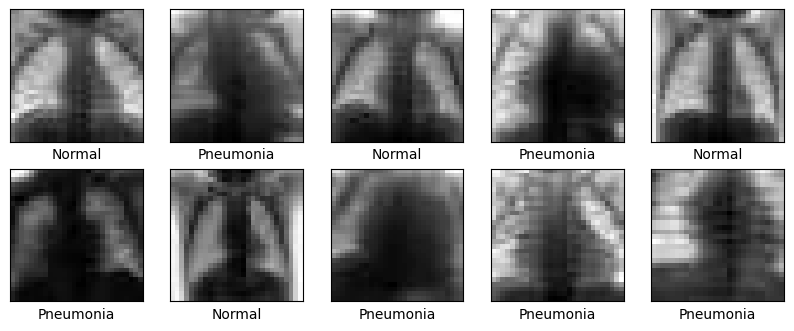

In [7]:
train_images, test_images = train_images / 255.0, test_images / 255.0

# Plot some training images to verify
class_names = ['Normal', 'Pneumonia']
plt.figure(figsize=(10,10))
for i in range(train_images.shape[0]):
    plt.subplot(5,5,i+1)
    plt.xticks([]), plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
# Create the CNN network
# Binary classification Normal (0), Pneumonia (1)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
# Dispaly the full CNN network's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,802 (362.51 KB)

 Trainable params: 92,802 (362.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7000 - loss: 0.6923 - val_accuracy: 0.4000 - val_loss: 0.7294
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.6000 - loss: 0.6704 - val_accuracy: 0.4000 - val_loss: 0.7655
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6000 - loss: 0.6607 - val_accuracy: 0.4000 - val_loss: 0.7962
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6000 - loss: 0.6597 - val_accuracy: 0.4000 - val_loss: 0.7952
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.6000 - loss: 0.6543 - val_accuracy: 0.4000 - val_loss: 0.7755
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.6000 - loss: 0.6482 - val_accuracy: 0.4000 - val_loss: 0.7515
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6000 - loss: 0.6432 - val_accuracy: 0.4000 - val_loss: 0.7366
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6000 - loss: 0.6359 - val_accuracy: 0.4000 - val_loss: 0.7374
Epoch 

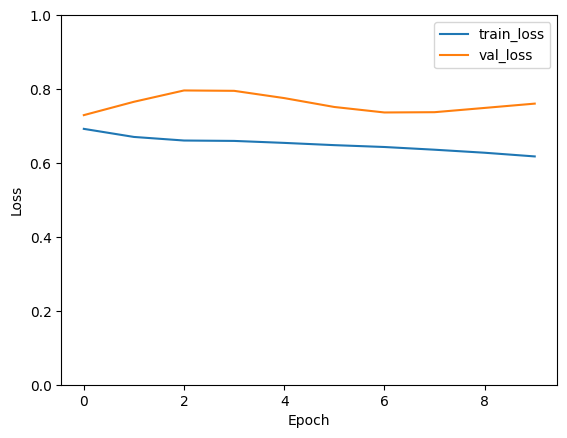

In [12]:
# Visualise the loss curve during training
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy = {test_acc * 100:.2f}%')

1/1 - 0s - 38ms/step - accuracy: 0.4000 - loss: 0.7605
Test accuracy = 40.00%


In [14]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [15]:
# calculate the evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred))

print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

Confusion Matrix:
[[0 6]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.40      1.00      0.57         4

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


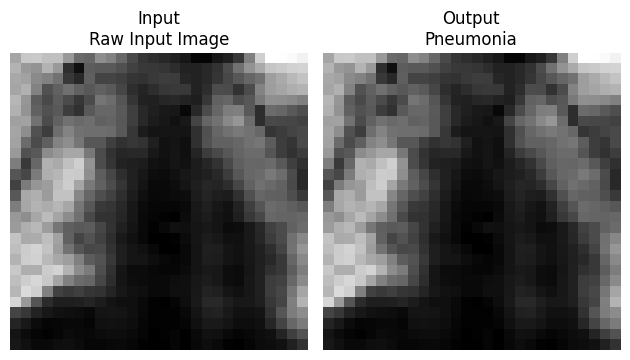

In [20]:
# Show one raw input image and its predicted output
# Select one raw image from the test set first image from test dataset

raw_image = test_images[0]

# Make prediction
prediction = model.predict(raw_image[np.newaxis, ...])
predicted_label = np.argmax(prediction, axis=1)[0]

# Map predicted and true labels to class names
class_names = ['Normal', 'Pneumonia']

predicted_class = class_names[predicted_label]

# Display the raw input image and the output with the predicted label
plt.figure

# Plot the raw input image
plt.subplot(1, 2, 1)
plt.imshow(raw_image.squeeze(), cmap=plt.cm.binary)
plt.title(f"Input\nRaw Input Image")
plt.axis('off')

# Plot the same image with the prediction
plt.subplot(1, 2, 2)
plt.imshow(raw_image.squeeze(), cmap=plt.cm.binary)
plt.title(f"Output\n{predicted_class}")
plt.axis('off')

plt.tight_layout()
plt.show()